# Data Science project

This project explores the MineCraft server and player data collected from Frank Woods reseach group in Computer Science at UBC. 

https://plai.cs.ubc.ca/
https://www.cs.ubc.ca/~fwood/



# Predictive question: Is there a relationship between hours played and age that predicts wheather a player has a newsletter subscription?

In the `player.csv` data set, 

- `played_hours` ranges from 0.000 to 223.100
- `subscribe` had obervations TRUE or FALSE correlating with a subscription or not
- `Age` ranges from 8 to 50 years old



In [5]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
player_data <- read_csv("data/players.csv")
player_data

summary(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

In [7]:
select_player_data <- player_data |> 
    select(subscribe, Age, played_hours)
select_player_data

subscribe,Age,played_hours
<lgl>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
⋮,⋮,⋮
FALSE,17,0.0
FALSE,17,2.3
TRUE,NA,0.2


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


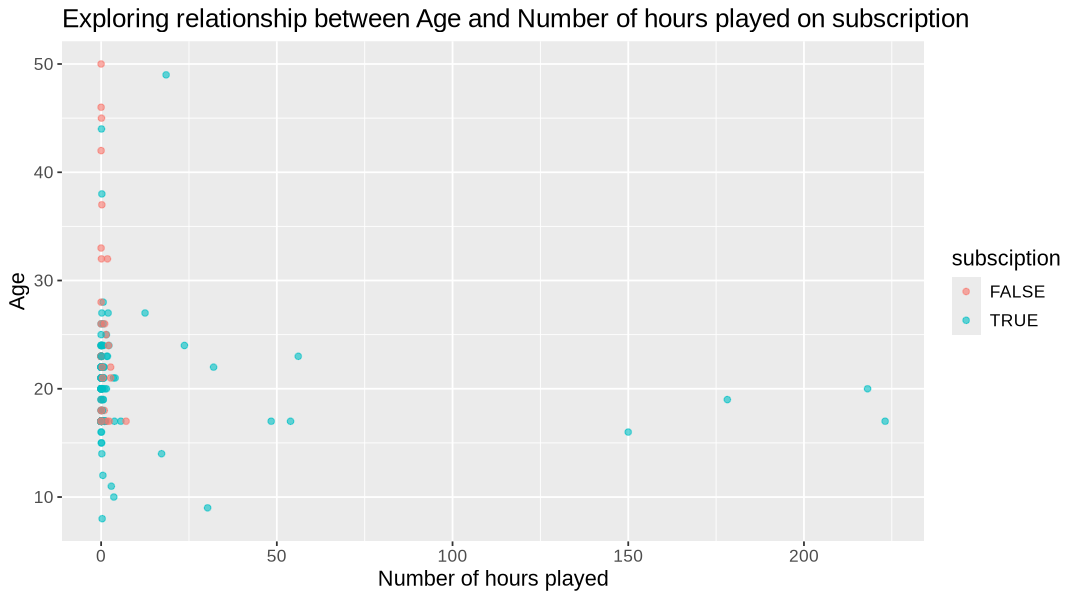

In [17]:
options(repr.plot.height = 5, repr.plot.width = 9)

player_data_plot <- select_player_data |>
    ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
    geom_point(alpha = 0.6) +
    labs(x = "Number of hours played", 
         y = "Age", 
         title = "Exploring relationship between Age and Number of hours played on subscription",
        color = "subsciption") +  
    theme(text = element_text(size = 13))
player_data_plot 